<a href="https://colab.research.google.com/github/scasey124/scasey124/blob/main/challenge4_CA_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas
!pip install shapely

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import requests, io
import chardet
import numpy as np
import geopandas as gpd
from shapely.geometry import Point


In [ ]:
def get_dataframes_from_csv(url):
    # Download the zip file
    r = requests.get(url)

    # Create a dictionary to store dataframes
    dataframes = {}

    # Open the zip file
    with zipfile.ZipFile(io.BytesIO(r.content)) as myzip:
        # Iterate through all files in the zip
        for filename in myzip.namelist():
            # Skip __MACOSX folder and any hidden files
            if '__MACOSX' in filename or filename.startswith('.'):
                continue

            # Check if the file is a CSV
            if filename.endswith('.csv'):
                # Open the CSV file
                with myzip.open(filename) as csvfile:
                    # Read the raw data
                    raw_data = csvfile.read()

                    # Detect the encoding
                    result = chardet.detect(raw_data)
                    encoding = result['encoding']

                    try:
                        # Try to read the CSV with the detected encoding
                        df = pd.read_csv(io.StringIO(raw_data.decode(encoding)))
                    except UnicodeDecodeError:
                        # If that fails, try with 'latin-1' encoding
                        df = pd.read_csv(io.StringIO(raw_data.decode('latin-1')))

                    # Store the dataframe in the dictionary, using the filename (without .csv) as the key
                    # Remove any directory structure from the filename
                    key = filename.split('/')[-1][:-4]
                    dataframes[key] = df

    return dataframes


In [ ]:
housing_df = get_dataframes_from_csv('https://github.com/datakind/datakit-housing-fall-2024/releases/download/v1.0/housing-data.zip')


In [ ]:
housing_df.keys()

dict_keys(['data_2-CA', 'data_dictionary_1-CA', 'data_1-CA', 'data_dictionary_2-CA', 'data_dictionary_1-FL', 'data_1-FL'])

In [ ]:
# establish dataframes
ca_housing_df1 = housing_df["data_1-CA"]
ca_housing_df2 = housing_df["data_2-CA"]

# data dictionaries for dataframes
ca_housing_df1_dict = housing_df["data_dictionary_1-CA"]
ca_housing_df2_dict = housing_df["data_dictionary_2-CA"]

In [ ]:
ca_housing_df1_dict.head()

,field_name,dk_column_name,description,dataset,data_source,source_link,year
0,b19083_001e,ACS - Gini Index of Income Inequality - Estimate,estimate-gini index,B19083 Gini Index of Income Inequality,US Census American Community Survey (5-year es...,https://data.census.gov/table/ACSDT5Y2022.B190...,2022.0
1,b19083_001m,ACS - Gini Index of Income Inequality - Margin...,margin_of_error-gini index,B19083 Gini Index of Income Inequality,US Census American Community Survey (5-year es...,https://data.census.gov/table/ACSDT5Y2022.B190...,2022.0
2,b23025_002e,ACS - Employment Status for the Population 16 ...,estimate-total:-in labor force:,B23025 Employment Status for the Population 16...,US Census American Community Survey (5-year es...,https://data.census.gov/table/ACSDT5Y2022.B230...,2022.0
3,b23025_002m,ACS - Employment Status for the Population 16 ...,margin_of_error-total:-in labor force:,B23025 Employment Status for the Population 16...,US Census American Community Survey (5-year es...,https://data.census.gov/table/ACSDT5Y2022.B230...,2022.0
4,b23025_004e,ACS - Employment Status for the Population 16 ...,estimate-total:-in labor force:-civilian labor...,B23025 Employment Status for the Population 16...,US Census American Community Survey (5-year es...,https://data.census.gov/table/ACSDT5Y2022.B230...,2022.0


In [ ]:
ca_housing_df1.head()

,geoid,geoid_year,state,county,state_fips_code,county_fips_code,loan_amount,median_mortgage_amount,median_prop_value,median_sba504_loan_amount,...,s2701_c05_015e,s2701_c05_015m,s2701_c05_001e,s2701_c05_001m,b19083_001e,b19083_001m,economic_distress_pop_agg,economic_distress_simple_agg,investment_areas,opzone
0,6001400400,2020,6,1,6,1,614.434904,825000.0,1775000.0,NaN,...,3.5,3.3,2.3,1.9,0.5063,0.0557,NO,NO,NO,0
1,6001400700,2020,6,1,6,1,7888.636063,585000.0,1225000.0,379000.0,...,2.8,2.2,2.5,1.6,0.4433,0.0512,YES,YES,YES,0
2,6001400800,2020,6,1,6,1,88162.749414,615000.0,995000.0,459500.0,...,0.0,2.1,2.9,2.9,0.5274,0.0727,NO,YES,YES,0
3,6001400900,2020,6,1,6,1,111849.950855,625000.0,1125000.0,329500.0,...,4.9,5.5,6.2,5.1,0.4619,0.0603,YES,YES,YES,0
4,6001401500,2020,6,1,6,1,269796.817978,515000.0,855000.0,391000.0,...,5.1,3.6,7.6,3.3,0.5611,0.0546,YES,YES,YES,1


In [ ]:
# check the columns and variable type
ca_housing_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Columns: 283 entries, geoid to opzone
dtypes: float64(231), int64(49), object(3)
memory usage: 4.8+ MB


In [ ]:
# check some baisc statistics about the features.
ca_housing_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
geoid,2227.0,6.055143e+09,2.637713e+07,6.001400e+09,6.037265e+09,6.059063e+09,6.073017e+09,6.115041e+09
geoid_year,2227.0,2.020000e+03,0.000000e+00,2.020000e+03,2.020000e+03,2.020000e+03,2.020000e+03,2.020000e+03
state,2227.0,6.000000e+00,0.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00
county,2227.0,5.494701e+01,2.645532e+01,1.000000e+00,3.700000e+01,5.900000e+01,7.300000e+01,1.150000e+02
state_fips_code,2227.0,6.000000e+00,0.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00
...,...,...,...,...,...,...,...,...
s2701_c05_001e,2227.0,-4.789695e+06,5.631712e+07,-6.666667e+08,2.950000e+00,5.600000e+00,9.900000e+00,4.590000e+01
s2701_c05_001m,2227.0,-1.596563e+06,1.877237e+07,-2.222222e+08,2.100000e+00,3.400000e+00,5.100000e+00,1.000000e+02
b19083_001e,2227.0,-6.885196e+06,6.741488e+07,-6.666667e+08,3.773000e-01,4.186000e-01,4.616500e-01,7.013000e-01
b19083_001m,2227.0,-2.295066e+06,2.247163e+07,-2.222222e+08,4.480000e-02,5.410000e-02,6.855000e-02,2.877000e-01


"Negative values (e.g., -4444...) have been set to null, with the exception of -5555... which has been set to zero. These negative values exist in the raw API data to indicate the following situations:
* The margin of error column indicates that either no sample observations or too few sample observations were available to compute a standard error and thus the margin of error.
* A statistical test is not appropriate.
Either no sample observations or too few sample observations were available to compute an estimate, or a ratio of medians cannot be calculated because one or both of the median estimates falls in the lowest interval or upper interval of an open-ended distribution.
* The median falls in the lowest interval of an open-ended distribution, or in the upper interval of an open-ended distribution. A statistical test is not appropriate.
* The estimate is controlled. A statistical test for sampling variability is not appropriate.
* The data for this geographic area cannot be displayed because the number of sample cases is too small."


source: https://www.arcgis.com/home/item.html?id=d227d6a4ee3e4d2d87eb9843ee14dd87



In [ ]:
def change_neg_values(df):
    # Iterate only over numeric columns
    for column in df.select_dtypes(include=[np.number]).columns:
        # Replace negative values except for -555555555 with NaN
        df[column] = df[column].mask((df[column] < 0) & (df[column] != -555555555), np.nan)
    return df

In [ ]:
# check missing value in each features
print('Checking missing data:')
null_mask = ca_housing_df1.isnull().any()

missing_df = pd.DataFrame({
    ''
    'missing count': ca_housing_df1.loc[:, null_mask].isna().sum(),
    'percent missing': (ca_housing_df1.loc[:, null_mask].isna().sum() / len(ca_housing_df1.loc[:, null_mask]) * 100)
})

# Reset index to convert the index into a column
missing_df.reset_index(inplace=True)

# Rename the index column to something meaningful, e.g., 'Column Name'
missing_df.rename(columns={'index': 'field_name'}, inplace=True)

# Sort the DataFrame by "percent missing" in descending order
missing_df = missing_df.sort_values(by='percent missing', ascending=False)

# Display the result for those missing more than 50% of values
missing_df[missing_df['percent missing'] > 50.0]

Checking missing data:


,field_name,missing count,percent missing
118,s1903_c03_006m,2211,99.281545
117,s1903_c03_006e,2209,99.191738
114,s1903_c03_004m,2101,94.342164
113,s1903_c03_004e,2091,93.893130
102,s1903_c03_011m,1889,84.822631
101,s1903_c03_011e,1869,83.924562
112,s1903_c03_003m,1619,72.698698
154,s1701_c03_017m,1596,71.665918
153,s1701_c03_017e,1596,71.665918
111,s1903_c03_003e,1592,71.486304


# Missing values are assciated with these field names:

* s1903_c03_006m	--> ACS - Median Household Income last 12 months (in 2022 Inflation-Adjusted Dollars) - By Race of Householder - Native Hawaiian and Other Pacific Islander - Margin of Error

* s1903_c03_006e	--> ACS - Median Household Income last 12 months (in 2022 Inflation-Adjusted Dollars) - By Race of Householder - Native Hawaiian and Other Pacific Islander - Estimate

* s1903_c03_004m	--> ACS - Median Household Income last 12 months (in 2022 Inflation-Adjusted Dollars) - By Race of Householder - American Indian and Alaska Native - Margin of Error

* s1903_c03_004e	--> ACS - Median Household Income last 12 months (in 2022 Inflation-Adjusted Dollars) - By Race of Householder - American Indian and Alaska Native - Estimate

* s1903_c03_011m	--> ACS - Median Household Income last 12 months (in 2022 Inflation-Adjusted Dollars) - By Age of Householder - 15 to 24 years - Margin of Error

* s1903_c03_011e	--> ACS - Median Household Income last 12 months (in 2022 Inflation-Adjusted Dollars) - By Age of Householder - 15 to 24 years - Estimate

* s1903_c03_003m	--> ACS - Median Household Income last 12 months (in 2022 Inflation-Adjusted Dollars) - By Race of Householder - Black or African American - Margin of Error

* s1701_c03_017m	--> ACS - Percentage Below Poverty Level (Poverty Status in the Past 12 Months) - By Race - Native Hawaiian and Other Pacific Islander - Margin of Error

* s1701_c03_017e	--> ACS - Percentage Below Poverty Level (Poverty Status in the Past 12 Months) - By Race - Native Hawaiian and Other Pacific Islander - Estimate

* s1903_c03_003e	--> ACS - Median Household Income last 12 months (in 2022 Inflation-Adjusted Dollars) - By Race of Householder - Black or African American - Estimate

* s2701_c05_020e	--> ACS - Percentage of Noninstitutionalized Population without Health Insurance (Uninsured) - By Race - Native Hawaiian and Other Pacific Islander - Estimate

* s2701_c05_020m	--> ACS - Percentage of Noninstitutionalized Population without Health Insurance (Uninsured) - By Race - Native Hawaiian and Other Pacific Islander - Margin of Error

* s2701_c03_020e	--> ACS - Percentage of Noninstitutionalized Population with Health Insurance (Insured) - By Race - Native Hawaiian and Other Pacific Islander - Estimate

* s2701_c03_020m  --> ACS - Percentage of Noninstitutionalized Population with Health Insurance (Insured) - By Race - Native Hawaiian and Other Pacific Islander - Margin of Error

Most missing values are associated with these populations:
  * Native Hawaiian and Other Pacific Islander
  * American Indian and Alaska Native
  * Black or African American

Inital thoughts:
* may be due to lower population numbers compared to other ethnic groups within california
* % of responses of given individuals within these groups
* untrustworiness of government (this is a government survery) due to historial and current marginaliztion and mistreatment (see above)
* statistical tests were not appropriate due to low response numbers

In [ ]:
filtered_df = ca_housing_df1.loc[:, ~ca_housing_df1.columns.str.match(r'^s\d')]
filtered_df.head()

,geoid,geoid_year,state,county,state_fips_code,county_fips_code,loan_amount,median_mortgage_amount,median_prop_value,median_sba504_loan_amount,...,b23025_006e,b23025_006m,b23025_002e,b23025_002m,b19083_001e,b19083_001m,economic_distress_pop_agg,economic_distress_simple_agg,investment_areas,opzone
0,6001400400,2020,6,1,6,1,614.434904,825000.0,1775000.0,NaN,...,19,32,2562,421,0.5063,0.0557,NO,NO,NO,0
1,6001400700,2020,6,1,6,1,7888.636063,585000.0,1225000.0,379000.0,...,0,13,3270,479,0.4433,0.0512,YES,YES,YES,0
2,6001400800,2020,6,1,6,1,88162.749414,615000.0,995000.0,459500.0,...,14,27,2922,519,0.5274,0.0727,NO,YES,YES,0
3,6001400900,2020,6,1,6,1,111849.950855,625000.0,1125000.0,329500.0,...,0,13,2065,391,0.4619,0.0603,YES,YES,YES,0
4,6001401500,2020,6,1,6,1,269796.817978,515000.0,855000.0,391000.0,...,0,13,1941,475,0.5611,0.0546,YES,YES,YES,1


In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   geoid                         2227 non-null   int64  
 1   geoid_year                    2227 non-null   int64  
 2   state                         2227 non-null   int64  
 3   county                        2227 non-null   int64  
 4   state_fips_code               2227 non-null   int64  
 5   county_fips_code              2227 non-null   int64  
 6   loan_amount                   2082 non-null   float64
 7   median_mortgage_amount        2206 non-null   float64
 8   median_prop_value             2203 non-null   float64
 9   median_sba504_loan_amount     1142 non-null   float64
 10  median_sba7a_loan_amount      1658 non-null   float64
 11  num_mortgage                  2206 non-null   float64
 12  num_mortgage_denials          2206 non-null   float64
 13  num

In [ ]:
filtered_df[['geoid', 'state', 'county', 'state_fips_code', 'county_fips_code', 'opzone']] = filtered_df[['geoid', 'state', 'county', 'state_fips_code', 'county_fips_code', 'opzone']].astype('str')

In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   geoid                         2227 non-null   object 
 1   geoid_year                    2227 non-null   int64  
 2   state                         2227 non-null   object 
 3   county                        2227 non-null   object 
 4   state_fips_code               2227 non-null   object 
 5   county_fips_code              2227 non-null   object 
 6   loan_amount                   2082 non-null   float64
 7   median_mortgage_amount        2206 non-null   float64
 8   median_prop_value             2203 non-null   float64
 9   median_sba504_loan_amount     1142 non-null   float64
 10  median_sba7a_loan_amount      1658 non-null   float64
 11  num_mortgage                  2206 non-null   float64
 12  num_mortgage_denials          2206 non-null   float64
 13  num

In [ ]:
county_names = {
    "1": "Alameda",
    "3": "Alpine",
    "5": "Amador",
    "7": "Butte",
    "9": "Calaveras",
    "11": "Colusa",
    "13": "Contra Costa",
    "15": "Del Norte",
    "17": "El Dorado",
    "19": "Fresno",
    "21": "Glenn",
    "23": "Humboldt",
    "25": "Imperial",
    "27": "Inyo",
    "29": "Kern",
    "31": "Kings",
    "33": "Lake",
    "35": "Lassen",
    "37": "Los Angeles",
    "39": "Madera",
    "41": "Marin",
    "43": "Mariposa",
    "45": "Mendocino",
    "47": "Merced",
    "49": "Modoc",
    "51": "Mono",
    "53": "Monterey",
    "55": "Napa",
    "57": "Nevada",
    "59": "Orange",
    "61": "Placer",
    "63": "Plumas",
    "65": "Riverside",
    "67": "Sacramento",
    "69": "San Benito",
    "71": "San Bernardino",
    "73": "San Diego",
    "75": "San Francisco",
    "77": "San Joaquin",
    "79": "San Luis Obispo",
    "81": "San Mateo",
    "83": "Santa Barbara",
    "85": "Santa Clara",
    "87": "Santa Cruz",
    "89": "Shasta",
    "93": "Siskiyou",
    "95": "Solano",
    "97": "Sonoma",
    "99": "Stanislaus",
    "101": "Sutter",
    "103": "Tehama",
    "105": "Trinity",
    "107": "Tulare",
    "109": "Tuolumne",
    "111": "Ventura",
    "113": "Yolo",
    "115": "Yuba"
}

filtered_df['county'] = filtered_df['county'].replace(county_names)

In [ ]:
filtered_df['county']

,county
0,Alameda
1,Alameda
2,Alameda
3,Alameda
4,Alameda
...,...
2222,Yuba
2223,Yuba
2224,Yuba
2225,Yuba


In [ ]:
# Categorical variables (excluding specified unique columns)
cat_var = filtered_df.select_dtypes(include=['object', 'category']).columns.tolist()
# Remove any specified columns that shouldn't be included
cat_var = [col for col in cat_var if col not in ['geoid', 'state', 'county', 'state_fips_code', 'county_fips_code']]

# Continuous variables (excluding specified year column)
cont_var = filtered_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Remove any specified year columns that shouldn't be included
cont_var = [col for col in cont_var if col != 'geoid_year']

In [ ]:
#Figure 1
#continuous variables

import seaborn as sns
import matplotlib.pyplot as plt

def continuous_analysis(df, cols, hue=None, rows=2, columns=4):
    """Labelled and color-coded visualizations of continuous variables."""
    fig, axes = plt.subplots(rows, columns, figsize=(10, 8))
    axes = axes.flatten()

    for var, count in zip(cols, axes):
        sns.histplot(df[var], ax=count, kde=True,
                     edgecolor='black', alpha=0.8)  # Directly use 'edgecolor' and 'alpha'
        count.tick_params()
        count.set_title(f'{str(var).capitalize()}')

    plt.tight_layout()
    plt.show()


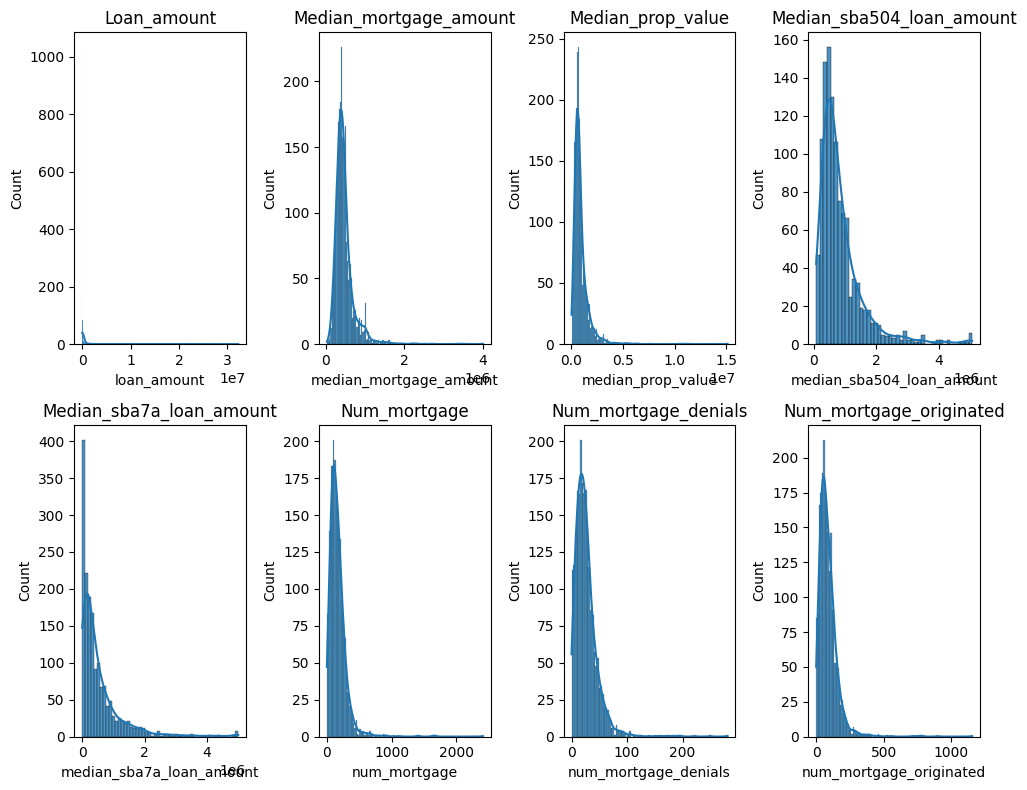

<Figure size 640x480 with 0 Axes>

In [ ]:
#figure 2
continuous_analysis(filtered_df, cont_var)
plt.suptitle("Categorical Univariate Analysis", fontsize = 12, y = 1.02)
plt.show()

In [ ]:
def categorical_analysis(df, cols, rows=2, hue=None, columns=2):
    """Labeled and color-coded visualizations of categorical (including binary) variables."""
    fig, axes = plt.subplots(rows, columns, figsize=(10, 8))
    axes = axes.flatten()

    for var, ax in zip(cols, axes):
        sns.countplot(x=var,
                      data=df,
                      ax=ax,
                      hue = hue,
                      order=df[var].value_counts().index,
                      palette="Paired")  # Optional: choose a color palette

        ax.tick_params()
        total = float(len(df[var]))
        ax.set_title(f'{str(var).capitalize()}')

        # Add percentages to the bars
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2.,
                    height + 2,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha='center')

    plt.tight_layout()

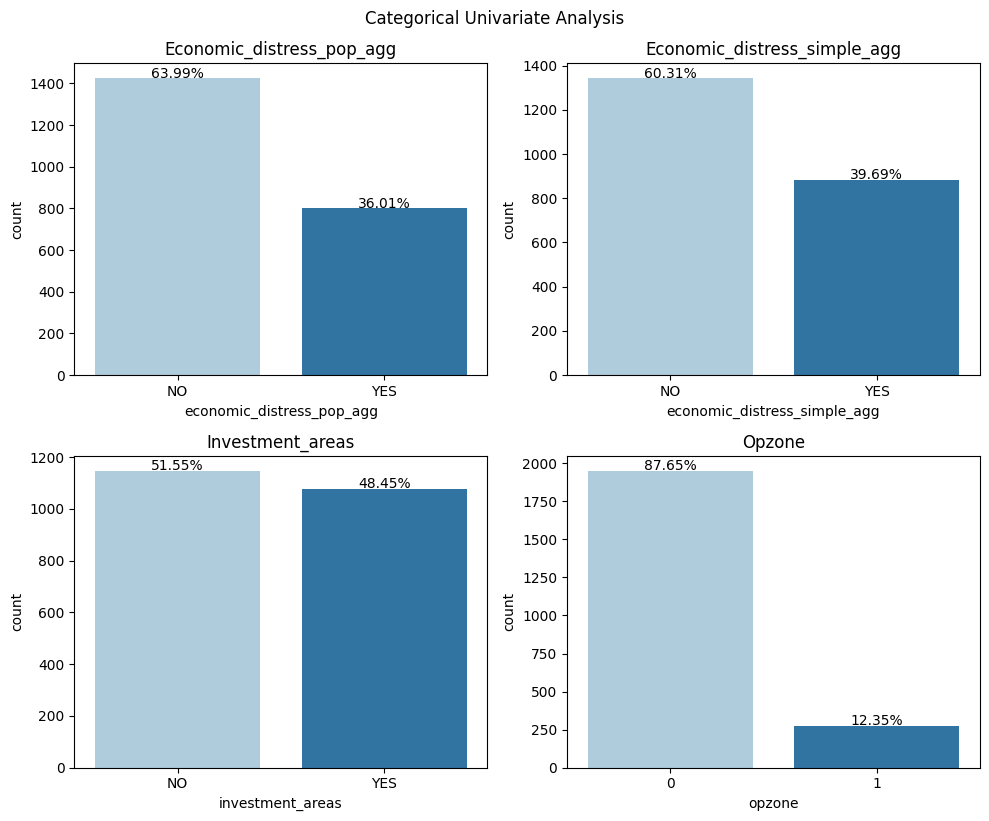

In [ ]:
#figure 2
categorical_analysis(filtered_df, cat_var)
plt.suptitle("Categorical Univariate Analysis", fontsize = 12, y = 1.02)
plt.show()

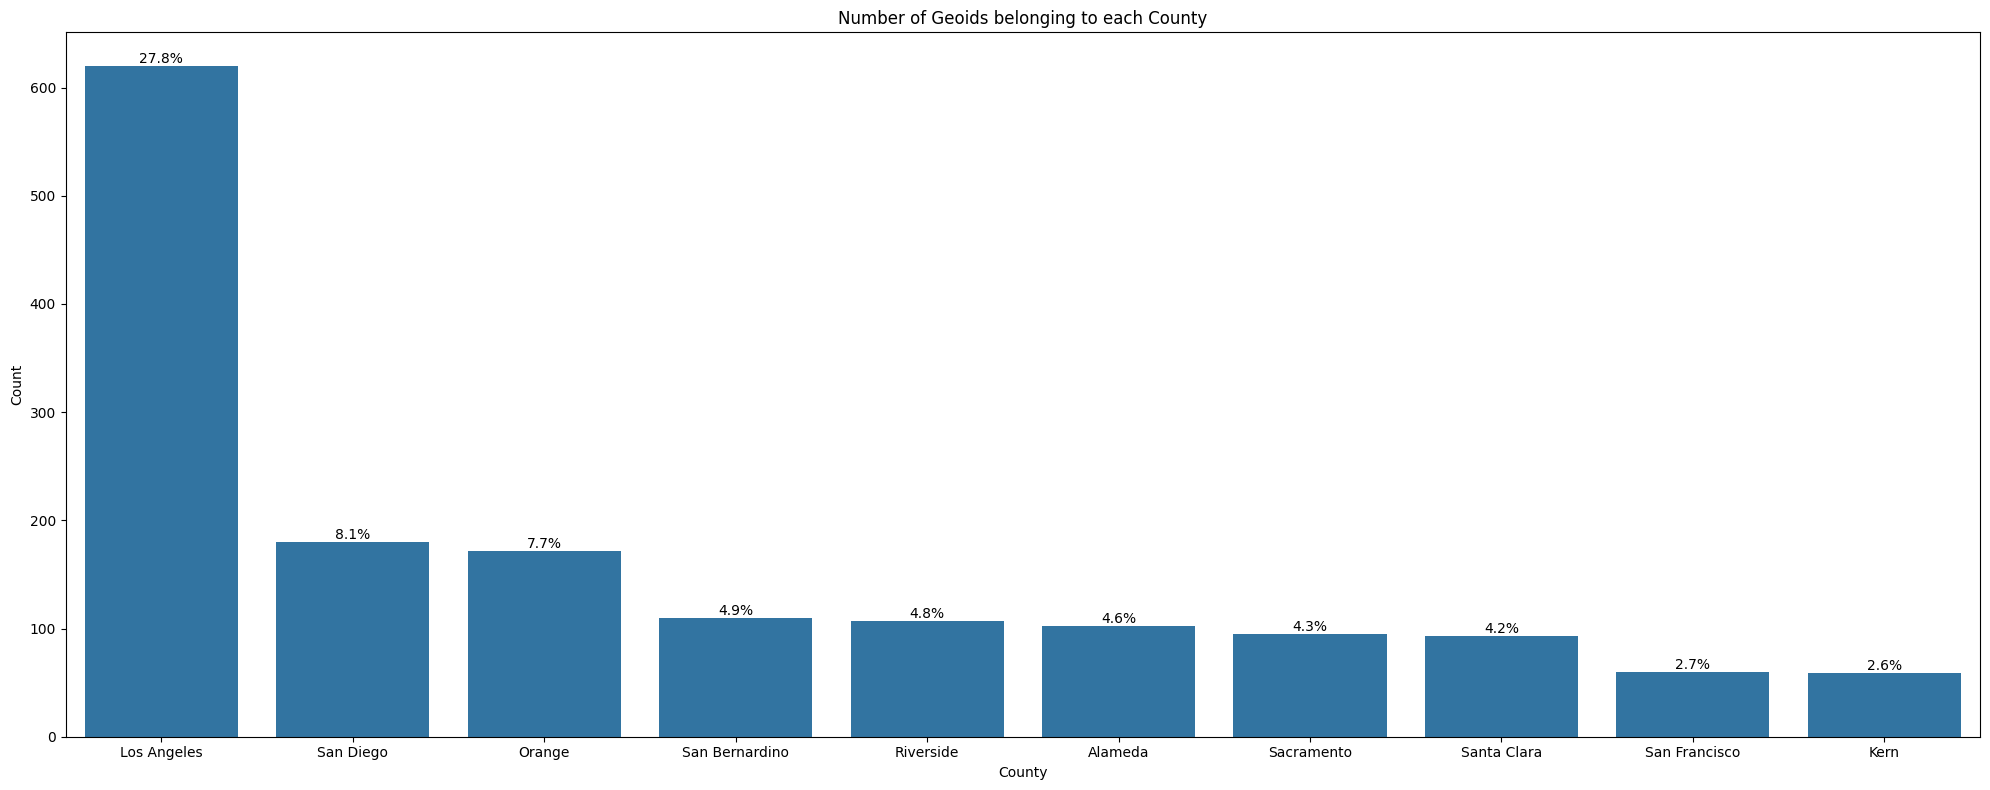

In [ ]:
plt.figure(figsize=(20, 8))

# Get the value counts in descending order
s = filtered_df['county'].value_counts(ascending=False).head(10)

# Plot the countplot with ordered categories
ax = sns.countplot(x='county', data=filtered_df, order=s.index)

# get the total count of the type column
total = filtered_df['county'].count()

# annotate the bars with fmt from matplotlib v3.7.0
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{(x/total)*100:0.1f}%')

ax.set(xlabel='County', ylabel='Count', title='Number of Geoids belonging to each County')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_county_by_hue(df, target_column, hue_columns, top_n=10):
    """Plots count of 'county' by different hue categories and annotates percentages."""

    # Get the value counts in descending order and select the top N counties
    s = df[target_column].value_counts(ascending=False).head(top_n)

    # Create subplots, one for each hue
    rows = 2  # Modify this if you want more rows
    cols = 2  # Number of columns based on the number of hue columns
    fig, axes = plt.subplots(rows, cols, figsize=(20, 8))

    # Ensure axes is iterable, even with one hue
    axes = axes.flatten()

    # Loop through each hue and plot the corresponding countplot
    for ax, hue in zip(axes, hue_columns):
        sns.countplot(x=target_column, data=df, order=s.index, hue=hue, ax=ax)

        # Get total count for annotating
        total = df[target_column].count()

        # Annotate the bars with percentages
        for c in ax.containers:
            ax.bar_label(c, fmt=lambda x: f'{(x/total)*100:0.1f}%')

        # Set title and labels
        ax.set(xlabel=f'{target_column.capitalize()}', ylabel='Count', title=f'Number of Geoids by County and {hue.capitalize()}')

    # Adjust layout
    plt.tight_layout()
    plt.show()

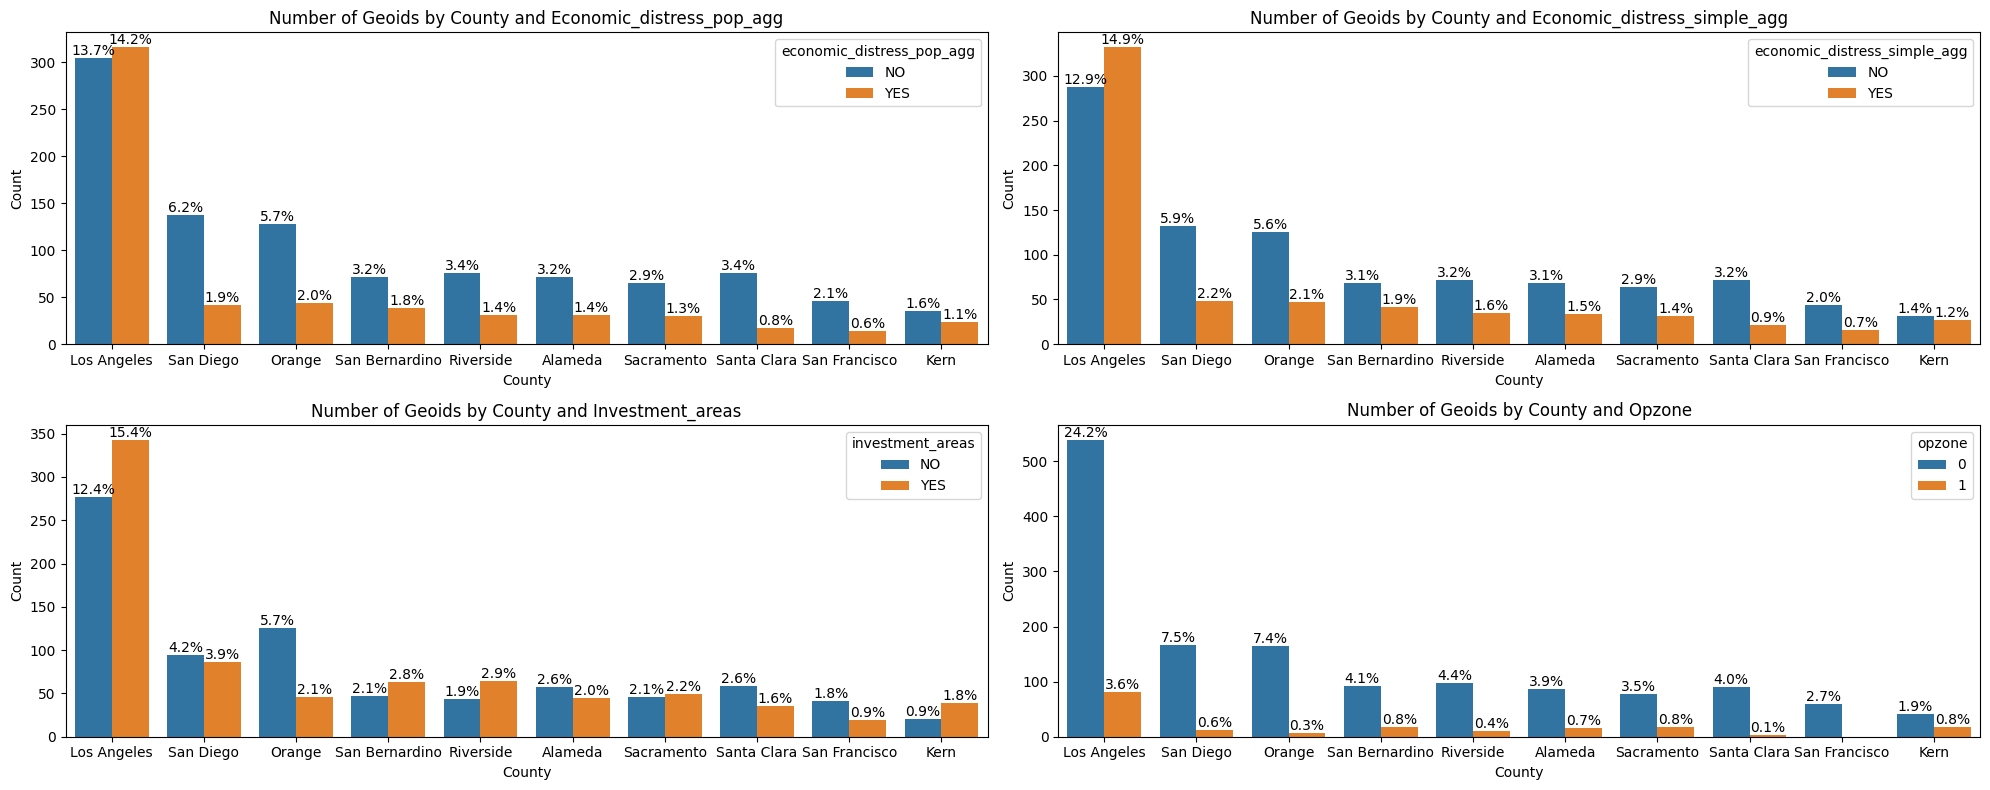

In [ ]:
plot_county_by_hue(filtered_df, 'county', cat_var, top_n=10)

"Opportunity Zones are census tracts that are economically-distressed communities where new investments may, under certain conditions, be eligible for preferential federal tax treatment or preferential consideration for federal grants and programs. They were added to the Internal Revenue Service tax code in 2017." - https://economicdevelopment.business.ca.gov/frequently-asked-questions/

0 = 'no'
1 = 'yes'

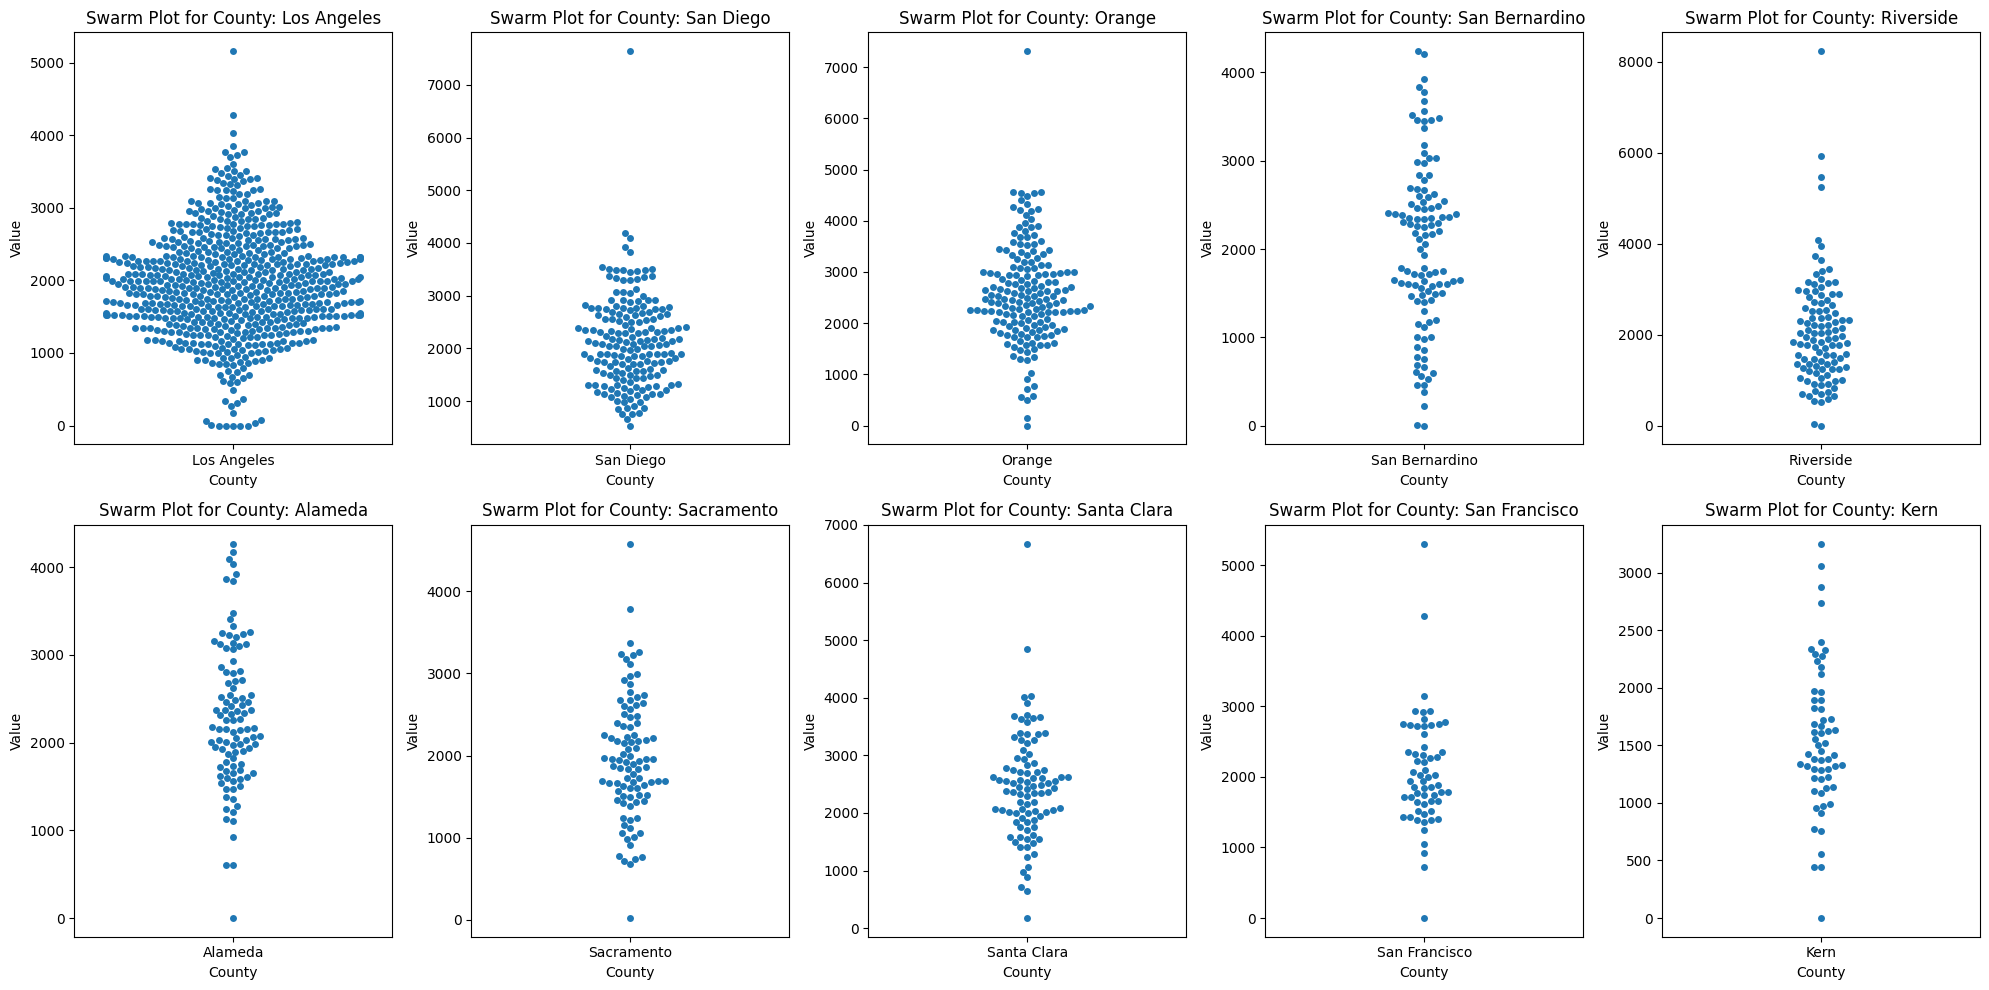

In [ ]:
# Get the top 10 counties by count
top_10_counties = filtered_df['county'].value_counts(ascending=False).head(10).index

# Number of rows and columns for the grid
n_rows = 2  # Change this value as needed
n_cols = 5  # Change this value as needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Loop through each county in the top 10 counties
for i, county in enumerate(top_10_counties):
    # Filter the DataFrame for the current county
    county_data = filtered_df[filtered_df['county'] == county]

    # Check if there is data for the current county
    if county_data.empty:
        print(f"No data available for county: {county}")
        continue  # Skip to the next county if there's no data

    # Create the swarm plot on the corresponding subplot
    sns.swarmplot(x='county', y='b23025_004e', data=county_data, ax=axes[i])
    axes[i].set_title(f'Swarm Plot for County: {county}')
    axes[i].set_xlabel('County')
    axes[i].set_ylabel('Value')

# Hide any empty subplots if the number of counties is less than the total number of subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

In [ ]:
#totalpop is the total population dataframe
#Gini Index of Income Inequality
average_econ_dist_pop = filtered_df.groupby(filtered_df.county).apply(lambda x: x['b19083_001e'].mean())

In [ ]:
average_econ_dist_pop.sort_values(ascending = False).head(10)

,0
county,
Alpine,0.573300
Trinity,0.527350
Mendocino,0.497060
El Dorado,0.471819
San Francisco,0.471075
Tuolumne,0.469600
Lake,0.466750
Humboldt,0.459273
Marin,0.457861
